In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

import librosa
import librosa.display
import IPython.display as ipd

In [2]:
music_knn=pd.read_csv('features_3_sec.csv')
music_knn.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [4]:
label_encoder = LabelEncoder()
music_knn['label'] = label_encoder.fit_transform(music_knn['label'])

In [5]:
X = music_knn.drop(['label','filename'],axis=1)
y = music_knn['label'] 

In [6]:
cols = X.columns

In [7]:
scaler = MinMaxScaler()

In [8]:
scaled = scaler.fit_transform(X)

In [9]:
scaled

array([[0.        , 0.3553988 , 0.71675699, ..., 0.02679679, 0.50674637,
        0.04778078],
       [0.        , 0.36732176, 0.67034733, ..., 0.08241395, 0.59302914,
        0.06554772],
       [0.        , 0.37315856, 0.72806736, ..., 0.0438406 , 0.5462638 ,
        0.03606165],
       ...,
       [0.        , 0.37419556, 0.69754793, ..., 0.03992147, 0.50593726,
        0.04538043],
       [0.        , 0.43653695, 0.65774457, ..., 0.01910101, 0.51990048,
        0.01373955],
       [0.        , 0.40815099, 0.67614332, ..., 0.03194326, 0.46137225,
        0.03454808]])

In [10]:
scaled.shape

(9990, 58)

In [11]:
X = pd.DataFrame(scaled, columns = cols)
X.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.0,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.0,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.0,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.0,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [14]:
def model_prediction(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_prediction(knn, "KNN")

[[223   1  16   2   1   8   0   0  11   7]
 [  0 275   1   1   0  12   0   0   0   1]
 [  8   6 245  11   0   8   0   0  12  10]
 [  5   2   8 269   7   1   2   3   4  15]
 [  1   0  12  25 207   1   4  15  27   4]
 [  3  38  16   3   1 234   1   1   2   1]
 [  5   1   2  15   5   0 267   0   2  21]
 [  0   2   9  26   6   4   0 254  19   2]
 [  0   1  11  14  19   1   3   9 241   4]
 [  9   3  15  35   1   6   5   1  13 195]]
Accuracy KNN : 0.80414


In [17]:
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_prediction(rf, "Random Forest")

[[226   0  18   3   2   6  10   0   2   2]
 [  0 281   1   0   0   6   0   0   0   2]
 [ 15   2 229  12   1  21   1   0  12   7]
 [  7   1  16 221  11   1  13   8  14  24]
 [  2   1   4  20 226   1  10  13  17   2]
 [  5  22   6   3   0 260   1   1   1   1]
 [  3   1   1   1   4   0 294   0   5   9]
 [  0   1  17  13  11   4   0 263   8   5]
 [  3   0   9  16  11   1   3  12 245   3]
 [ 12   0  22  28   0   7  18   2  17 177]]
Accuracy Random Forest : 0.80814


In [18]:
# xgboost
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_prediction(xgb, "Cross Gradient Booster")

C:\Users\shrad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[250   0   6   3   1   3   0   0   1   5]
 [  0 284   0   1   0   3   0   0   0   2]
 [  6   0 274   4   0   8   0   1   3   4]
 [  3   1   7 274   2   0   1  12   3  13]
 [  0   1   3   8 271   0   3   6   4   0]
 [  5  13   4   0   0 275   0   1   0   2]
 [  4   1   1   0   5   0 293   0   0  14]
 [  0   1   5   6   8   3   0 293   1   5]
 [  3   0   5   6   9   0   1   7 270   2]
 [  4   2   6   7   1   4  10   1   3 245]]
Accuracy Cross Gradient Booster : 0.91058


In [19]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)

C:\Users\shrad\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [20]:
preds = xgb.predict(X_test)
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5))

Accuracy : 0.91058


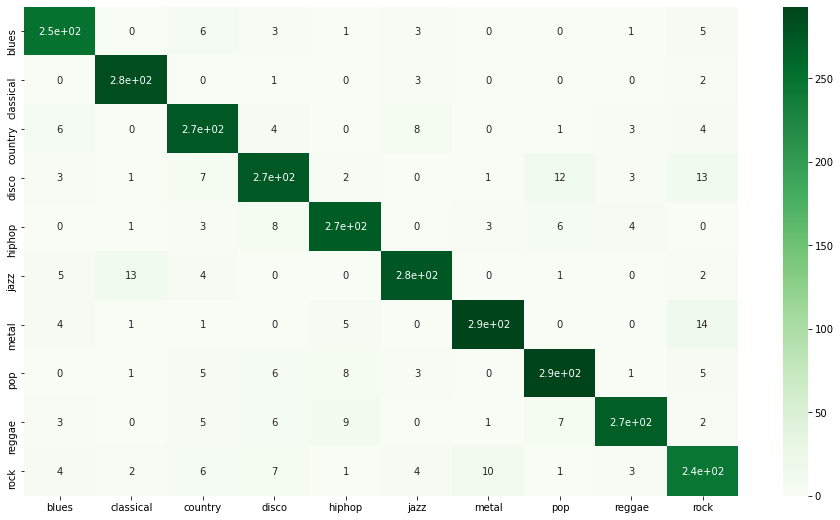

In [21]:
matrix = confusion_matrix(y_test, preds) 
plt.figure(figsize = (16, 9))
sns.heatmap(matrix, cmap="Greens", annot=True, 
        xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
        yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")